In [1]:
# importing important libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,f1_score,recall_score,precision_score

In [2]:
# to display all columns
pd.set_option('display.max_columns', None)

# Data Dictionary

* hotel: Type of hotel(Resort hotel or City Hotel)

* is_canceled: Value indicating if the booking was canceled (1) or not (0)

* lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* arrival_date_year: Year of arrival date

* arrival_date_month: Month of arrival date

* arrival_date_week_number: Week number of year for arrival date

* arrival_date_day_of_month: Day of arrival date

* stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* adults: Number of adults

* children: Number of children

* babies: Number of babies

* meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

* country: Country of origin. Categories are represented in the ISO 3155–3:2013 format

* market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)

* previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking

* previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking

* reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

* agent: ID of the travel agency that made the booking

* company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer

* customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

* adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* required_car_parking_spaces: Number of car parking spaces required by the customer

* total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)

* reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

* reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

# Data reading and basic eyeballing

In [3]:
# reading the data and first five rows
data=pd.read_csv('hotel_bookings.csv')
df=data.copy()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Summary statistics
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# Corelation matrix
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


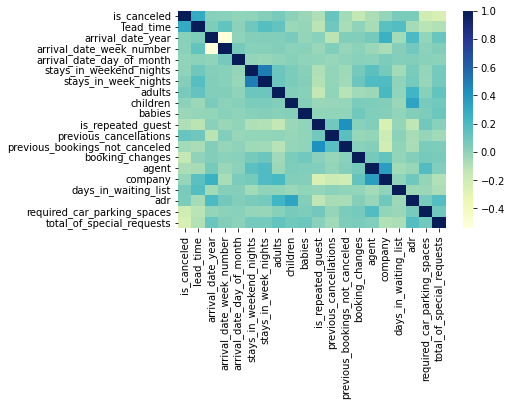

In [7]:
# heatmap for the corelation matrix
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

In [8]:
# Checking for missing values
df.isnull().sum()[df.isnull().sum()>0]
# Data has missing values

children         4
country        488
agent        16340
company     112593
dtype: int64

In [9]:
# Checking for class imbalance in the target variable
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

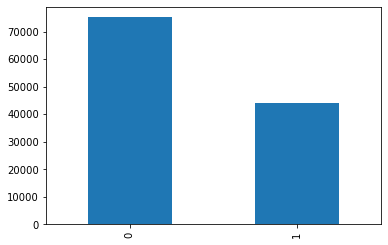

In [10]:
df.is_canceled.value_counts().plot.bar()
plt.show()
# The data imbalance seems to minimum
# For now we don't seem to be needing balancing the target variable

# Data cleaning and Handling of missing Values

In [11]:
df.isnull().sum()[df.isnull().sum()>0]
#Cheking columnsb which have missing values

children         4
country        488
agent        16340
company     112593
dtype: int64

In [12]:
# Now we will fill the agent column
# We see that other than the missing values we have agent ids
# We will fill the missing values with 'No Agent' and the agent ids with 'Agent' 

In [13]:
# First we will fill the agent ids with 'Agent'
df.loc[df.agent.isnull()==False,'agent']='Agent'

In [14]:
# Now we will fill the null values with 'No agent'
df.agent.fillna('No agent',inplace=True)

In [15]:
df.isnull().sum()[df.isnull().sum()>0]

children         4
country        488
company     112593
dtype: int64

In [16]:
# We would fill the missing values in the country coulumns with 'Unknown' since we do not seem to find any references to other columns
df.country.fillna('Unknown',inplace=True)

In [17]:
df.isnull().sum()[df.isnull().sum()>0]

children         4
company     112593
dtype: int64

In [18]:
# We would fill the missing values in the children column with 0
df.children.fillna(0,inplace=True)

In [19]:
df.isnull().sum()[df.isnull().sum()>0]

company    112593
dtype: int64

In [20]:
# We see that in some rows market segment or distribution channel is given as corporate where the company row is null
# We will fill these null values with 'Company'
df.loc[((df.market_segment=='Corporate') | (df.distribution_channel=='Corporate')) & (df.company.isnull()),'company']='Corporate'

In [21]:
# Now we will fill the non missing values in company column with corporate as well
df.loc[df.company.isnull()==False,'company']='Corporate'

In [22]:
# Now we will fill the remaining missing values in the company column with 'Individuals'
df.company.fillna('Individuals',inplace=True)

In [23]:
df.isnull().sum()
# The data has no missing values now

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [24]:
# Deduplicating the rows
df=df.drop_duplicates(keep='first').reset_index().drop(columns='index')

In [25]:
# Before doing our univariate analysis we would change the datatypes of columns to their correct datatype
df.arrival_date_year=df.arrival_date_year.astype(object)

In [26]:
# Also there are a lot of unique values in the country column
# so we would bin this column
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Unknown', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KN

In [27]:
# We would bin the country column in its respective continents
europe=['PRT','GBR','ESP','IRL','FRA','ROU','NOR','POL','DEU','BEL','CHE','GRC','ITA','NLD','DNK','RUS','SWE','EST',
       'CZE','FIN','LUX','SVN','ALB','UKR','SMR','LVA','SRB','AUT','BLR','LTU','TUR','HUN','HRV','GEO','AND','SVK',
       'MKD','BIH','BGR','MLT','ISL','MCO','LIE','MNE']

north_a=['USA','MEX','PRI','CRI','CUB','HND','NIC','GAB','PAN','SLV','GTM']

south_a=['ARG','BRA','CHL','URY','COL','VEN','SUR','PER','ECU','BOL','PRY','GUY']

asia=['OMN','CN','IND','CHN','ISR','KOR','ARE','HKG','IRN','CYP','KWT','MDV','KAZ','PAK','IDN','LBN','PHL','AZE','BHR',
     'THA','MYS','ARM','JPN','LKA','JOR','SYR','SGP','SAU','VNM','QAT','UZB','NPL','MAC','TWN','IRQ','KHM','BGD','TJK',
     'TMP','MMR','LAO']

africa=['MOZ','BWA','MAR','ZAF','AGO','ZMB','ZWE','DZA','TUN','CAF','NGA','SEN','SYC','CMR','MUS','COM','UGA','CIV',
       'BDI','EGY','MWI','MDG','TGO','DJI','STP','ETH','RWA','BEN','TZA','GHA','KEN','GNB','BFA','LBY','MLI','NAM',
       'MRT','SDN','SLE']

australia=['AUS']

Others=['CYM','CPV','JAM','GIB','JEY','GGY','FJI','NZL','DOM','PLW','BHS','KNA','IMN','VGB','GLP','UMI','MYT','FRO',
       'BRB','ABW','AIA','DMA','PYF','LCA','ATA','ASM','NCL','KIR','ATF']

unk=['Unknown']

In [28]:
def country_bin(x):
    if x in europe:
        return 'Europe'
    elif x in north_a:
        return 'North America'
    elif x in south_a:
        return 'South America'
    elif x in asia:
        return 'Asia'
    elif x in africa:
        return 'Africa'
    elif x in australia:
        return 'Australia'
    elif x in Others:
        return 'Others'
    elif x in unk:
        return 'Unknown'
df.country=df.country.apply(country_bin) #Binning the country column

In [29]:
df.country.unique()

array(['Europe', 'North America', 'Unknown', 'Asia', 'South America',
       'Australia', 'Africa', 'Others'], dtype=object)

### Reservation status is basically a column which will be filled after the event is occuring. So from a business perspective to need to be able to predict before the the confirmation from the customer. This column is going to be filled only filled when the confirmation from the customer is already given. So we need to exclude this column when model building

# Exploratory Data Analysis

## Column: Hotel

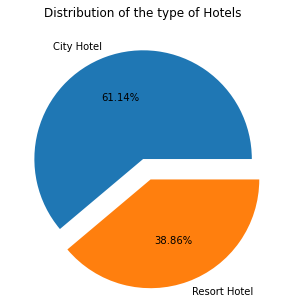

In [30]:
# column: hotel
# df.hotel.value_counts().plot.pie(autopct='%.2f%%',)
plt.rcParams['figure.figsize']=[5,5]
plt.pie(df.hotel.value_counts().values,explode=[0,0.2],labels=df.hotel.value_counts().index,autopct='%.2f%%')
plt.title('Distribution of the type of Hotels')
plt.show()

### There are more booking in city hotel compared to resort hotel. 

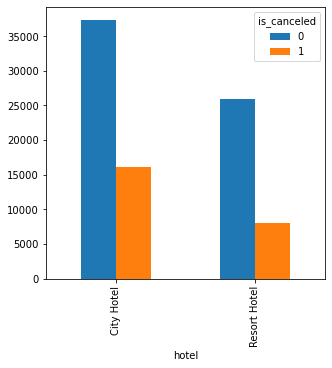

In [31]:
pd.crosstab(df.hotel,df.is_canceled).plot.bar()
plt.show()

#### We see that there are more cancellations in city hotels. But this could be because there are more records regarding city hotels. We would need to see the percentage of the records accordingly.

In [32]:
tbl=pd.crosstab(df.hotel,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
hotel,,,
City Hotel,37373,16047,53420
Resort Hotel,25985,7974,33959
All,63358,24021,87379


In [33]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']

In [34]:
tbl

is_canceled,0,1,All,cancel_percent
hotel,,,,
City Hotel,37373,16047,53420,30.039311
Resort Hotel,25985,7974,33959,23.481257
All,63358,24021,87379,27.490587


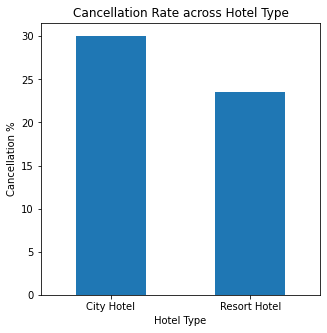

In [35]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.title('Cancellation Rate across Hotel Type')
plt.xlabel('Hotel Type')
plt.xticks(rotation=0)
plt.ylabel('Cancellation %')
plt.show()

#### We see that the percentage of cancellations is higher comparitively to resort hotel. Also since we have higher number of records in city hotel, this may imply that there could be overbooking occuring in city hotel. 

## Column: Lead time

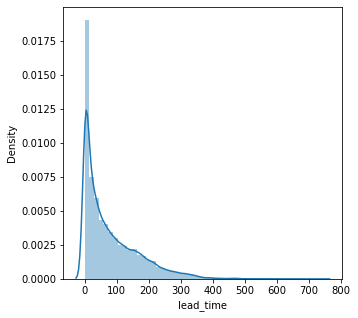

In [36]:
sns.distplot(df.lead_time)
plt.show()

#### We see that most of the records are between 0 and 200. Higher lead time could indicate that some records are booked for occasions and preplanned events.

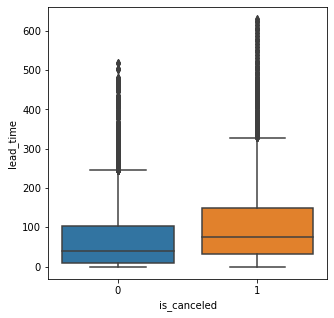

In [37]:
sns.boxplot(x='is_canceled',y='lead_time',data=df.loc[df.hotel=='City Hotel'])
plt.show()

#### From the above boxplot we can infer that cancelled bookings in city hotels have a higher lead time. This again indicates the presence of overbooking in the city hotels

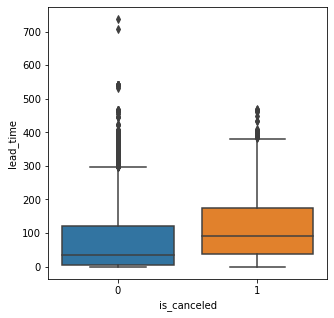

In [38]:
sns.boxplot(x='is_canceled',y='lead_time',data=df.loc[df.hotel=='Resort Hotel'])
plt.show()

#### From the above boxplots we infer that checked out bookings have a higher max lead time in resort hotels. But on average canceled bookings seem to be having higher lead time in resort hotels.

## Column: arrival date year

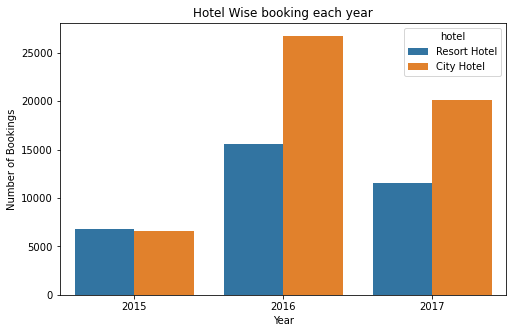

In [39]:
plt.rcParams['figure.figsize']=[8,5]
sns.countplot(x='arrival_date_year',data=df,hue='hotel')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.title('Hotel Wise booking each year')
plt.show()

#### From the above barplots we see that 2016 had the highest number of bookings. While 2015 had the least. This could imply that these hotels could newer and established around 2015.

In [40]:
# We will now check year wise cancellation rate
tbl=pd.crosstab(df.arrival_date_year,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
arrival_date_year,,,
2015,10605,2702,13307
2016,31178,11207,42385
2017,21575,10112,31687
All,63358,24021,87379


In [41]:
tbl['cancel-percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel-percent
arrival_date_year,,,,
2015,10605,2702,13307,20.305103
2016,31178,11207,42385,26.440958
2017,21575,10112,31687,31.912141
All,63358,24021,87379,27.490587


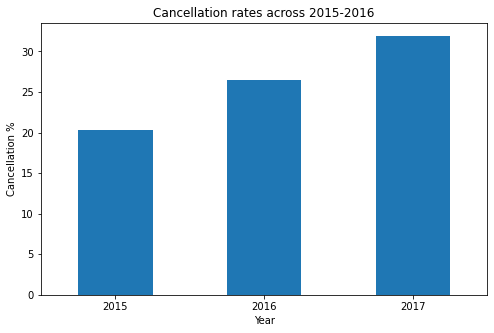

In [42]:
tbl.drop('All',axis=0)['cancel-percent'].plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Cancellation %')
plt.title('Cancellation rates across 2015-2016')
plt.show()

In [43]:
df[df.is_canceled==1]['arrival_date_year'].value_counts()/len(df[df.is_canceled==1])

2016    0.466550
2017    0.420965
2015    0.112485
Name: arrival_date_year, dtype: float64

#### We see that 2017 had the highest cancellation percentage compared to 2015 and 2016. This may be due to some issues with the hotels in 2016, possibly overbooking and customer dissatisfaction. This could also be because of a bit of degraded customer support on the part of the hotels. Also we see that the cancel percentage increases with each passing year. This again could be indication of an overbooking problem

## Column: arrival date month

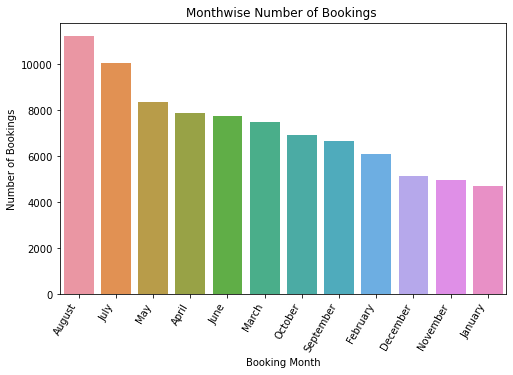

In [44]:
plt.rcParams['figure.figsize']=[8,5]
sns.countplot(x='arrival_date_month',data=df,order=df.arrival_date_month.value_counts().index)
plt.title('Monthwise Number of Bookings ')
plt.xlabel('Booking Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=60,ha='right')
plt.show()

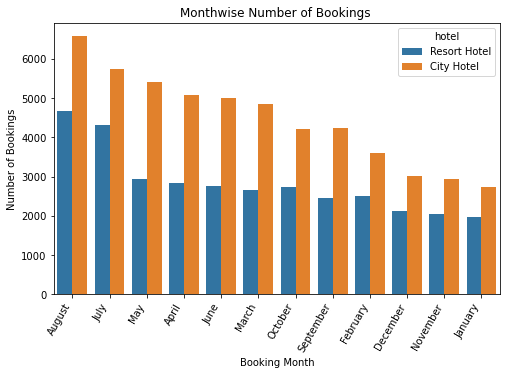

In [45]:
plt.rcParams['figure.figsize']=[8,5]
sns.countplot(x='arrival_date_month',data=df,order=df.arrival_date_month.value_counts().index,hue='hotel')
plt.title('Monthwise Number of Bookings ')
plt.xlabel('Booking Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that August and July have the highest number of bookings compared to any other month. There could be some kind of festival or carnivals that are a major tourist attraction during these months. This could also be because of school vacations during August and July. This could also mean more crowds and festivities in this month.

In [46]:
tbl=pd.crosstab(df.arrival_date_month,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
arrival_date_month,,,
April,5498,2409,7907
August,7633,3621,11254
December,3751,1378,5129
February,4682,1415,6097
January,3654,1038,4692
July,6858,3198,10056
June,5411,2353,7764
March,5681,1830,7511
May,5912,2442,8354


In [47]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']

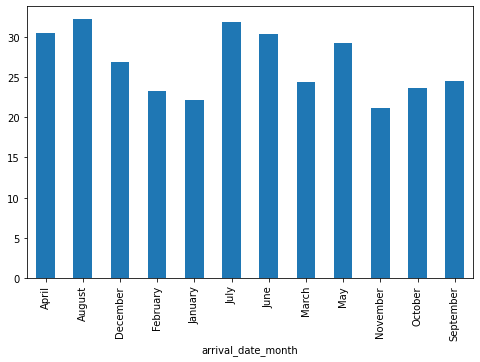

In [48]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.show()

#### We see that August has the highest cancellation percentage compared to any other month. This again indicates towards overbooking and rushed bookings during fesitivites times and vacations.

## Column: arrival date week number

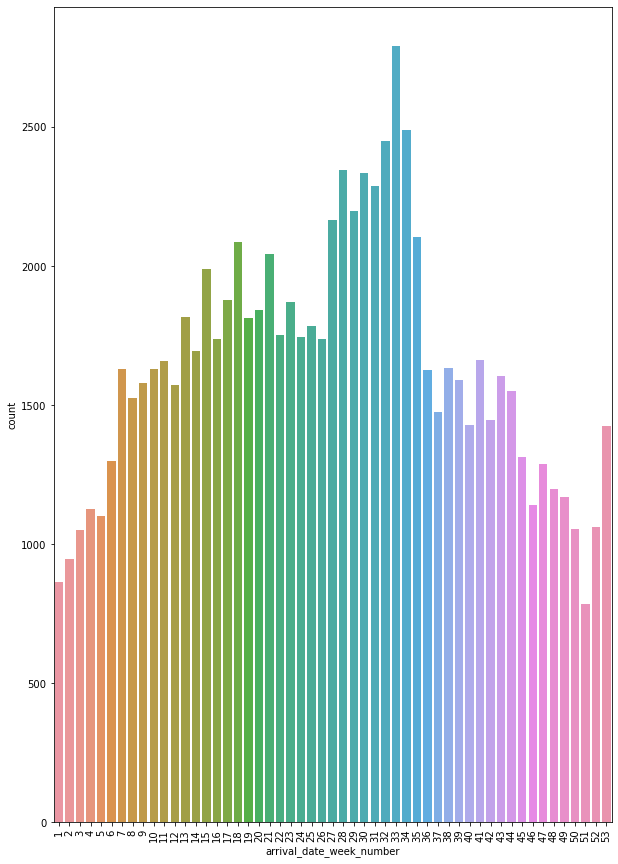

In [49]:
plt.figure(figsize=(10,15))
sns.countplot(x='arrival_date_week_number',data=df)
plt.xticks(rotation='vertical')
plt.show()

#### We see that week number 33 has the highest number of bookings compared to any other week. This week lies around the time of august which further supports the idea that we have festivities and vacations during the month of August. Also we see that there are considerably less number of bookings towards the end of the year, especially during week 51 which usually falls in December during the time of Christmas.

## Column: stays in weekend nights

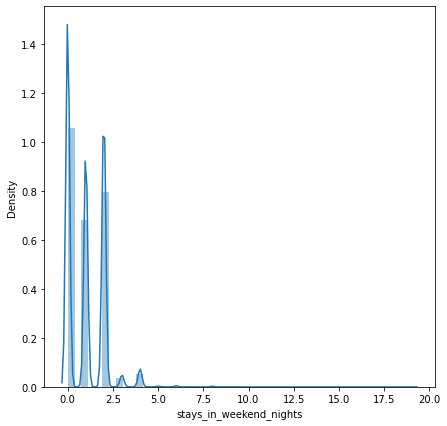

In [50]:
plt.figure(figsize=(7,7))
sns.distplot(df.stays_in_weekend_nights)
plt.show()

#### Most people stay for shorter stays in the hotels with the usual number being between 0 and 5. This means a month long vacation could be the most popular vacation and trip type in these hotels. There are records with longer stays. This could be about people visiting on longer project and work related corporate trips which extend to many months.

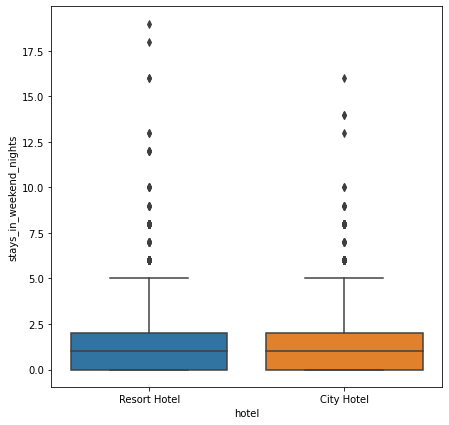

In [51]:
plt.figure(figsize=(7,7))
sns.boxplot(x='hotel',y='stays_in_weekend_nights',data=df)
plt.show()

#### We see that resort hotel usually has a higher stays in weekend nights compared to city hotel. Since resort hotels are usuaaly located near tourist attractions, beaches and forests, this could mean that work related trips could be for environmental studies or historical studies. 

#### We see that along with stays in weekend nights, stays in week nights has a similar pattern as well

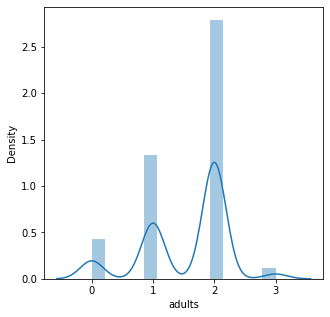

In [52]:
plt.figure(figsize=(5,5))
sns.distplot(df.loc[(df.stays_in_week_nights==0) & (df.stays_in_weekend_nights==0)]['adults'])
plt.show()

#### We observed that there are records containing 0 weekend stays, and 0 week nights stays and see that the number of adults in these is usually in small numbers. This could be couples,solo short trips. Records with 2 number of adults could indicate wedding aniversaries, birthdays. In these cases couples could be enjoying a casual stay in the hotels for a few hours for celebrations 

## Column: Babies

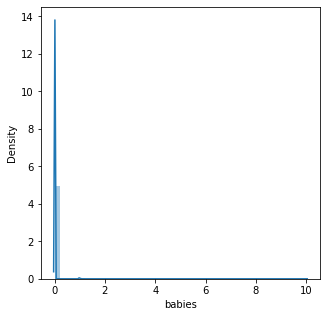

In [53]:
plt.figure(figsize=(5,5))
sns.distplot(df.babies)
plt.show()

#### We see that maximum records have 0 children. This indicates tha maximum trips are corporate, solo, couple and casual trips. There some records with higher number of babies which could mean presence of joint families on family trips.

#### We also see a similar pattern with the number of children column as well

## Column: meal

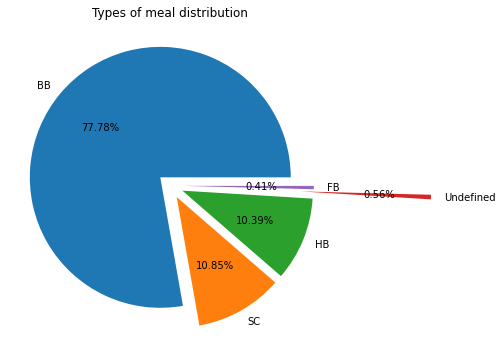

In [54]:
plt.figure(figsize=(8,6))
plt.pie(df.meal.value_counts().values,explode=[0.1,0.1,0.1,1,0.1],labels=df.meal.value_counts().index,autopct='%.2f%%')
plt.title('Types of meal distribution')
plt.show()

#### We see that most people order for a Bed and Breakfast meal package. Very few people go for a full board meal package. This could indicate the presence of popular restaurents around the hotels. A large number of people have ordered a no meal package as well. This further indicates the presence of popular restaurents around the hotels.

## Column: country

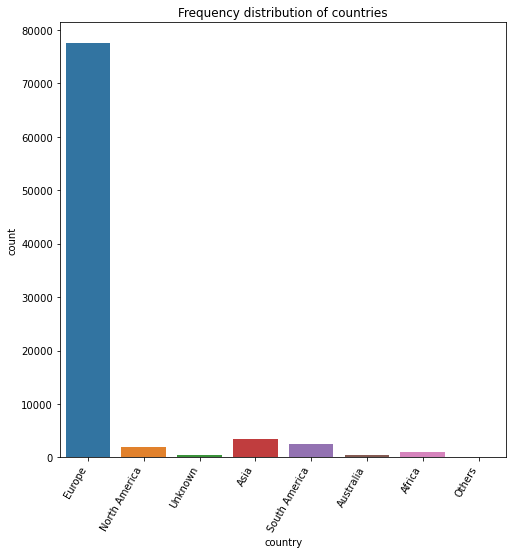

In [55]:
plt.figure(figsize=(8,8))
sns.countplot(x='country',data=df)
plt.title('Frequency distribution of countries')
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that most people booking for reservations are European. This could be because of the hotels being in Portugal and Portugal being a part of the European Union, which makes for easier travel for vacationers and travellers across the countries in European Union.

In [56]:
tbl=pd.crosstab(df.country,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
country,,,
Africa,559,436,995
Asia,2286,1141,3427
Australia,286,92,378
Europe,56573,20944,77517
North America,1531,474,2005
Others,106,53,159
South America,1599,847,2446
Unknown,418,34,452
All,63358,24021,87379


In [57]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
country,,,,
Africa,559,436,995,43.819095
Asia,2286,1141,3427,33.294427
Australia,286,92,378,24.338624
Europe,56573,20944,77517,27.018589
North America,1531,474,2005,23.640898
Others,106,53,159,33.333333
South America,1599,847,2446,34.627964
Unknown,418,34,452,7.522124
All,63358,24021,87379,27.490587


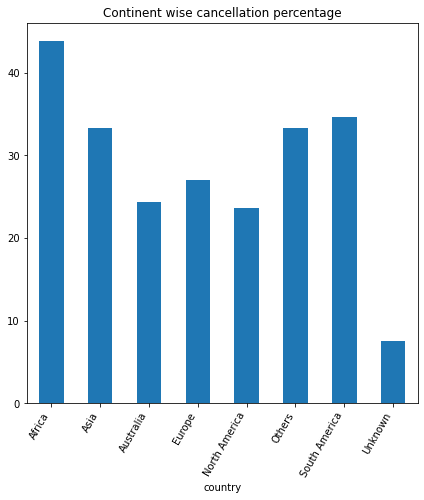

In [58]:
plt.figure(figsize=(7,7))
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.title('Continent wise cancellation percentage')
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that Africa has the highest rate of cancellation. Issues could be originating from issues with Visas(a hotel booking is mandatory for applying for a Portuguese entry visa) because some strict rules in the European Union(cancellation percentage in considerably less amongst European countries). Amongst the known continents, customers from North America seems to be having the least percentage of cancellation.

## Column: Market segment

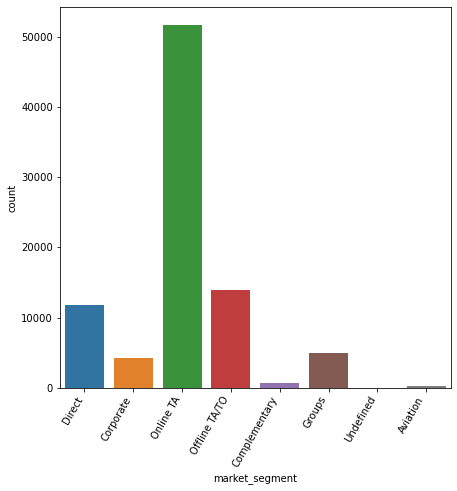

In [59]:
plt.rcParams['figure.figsize']=[7,7]
sns.countplot(x='market_segment',data=df)
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that most of the records are through Online Travel Agents indicating a strong presence of online travel agents with a strong network in Portugal. There are also records with market_segment as Aviation. These records could be of different flight crews and their stays in these hotels. There are some complementary segments as well. It could indicate a few cases of complaints from the end of customers. This could also indicate a policy of reimbursment or compensation on the part of the hotels.

In [60]:
tbl=pd.crosstab(df.market_segment,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
market_segment,,,
Aviation,182,45,227
Complementary,614,88,702
Corporate,3698,510,4208
Direct,10067,1737,11804
Groups,3606,1335,4941
Offline TA/TO,11822,2060,13882
Online TA,33369,18244,51613
Undefined,0,2,2
All,63358,24021,87379


In [61]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
market_segment,,,,
Aviation,182,45,227,19.823789
Complementary,614,88,702,12.535613
Corporate,3698,510,4208,12.119772
Direct,10067,1737,11804,14.715351
Groups,3606,1335,4941,27.018822
Offline TA/TO,11822,2060,13882,14.839360
Online TA,33369,18244,51613,35.347684
Undefined,0,2,2,100.000000
All,63358,24021,87379,27.490587


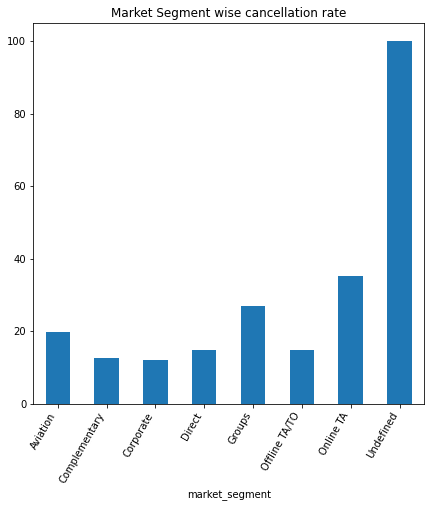

In [62]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.title('Market Segment wise cancellation rate')
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that undefined market segment has the highest cancellation rate. But there are only two records where market segment was undefined. Among the other market segments, cancellation rates were highest in the online TA segments.

## Column: Distribution channel

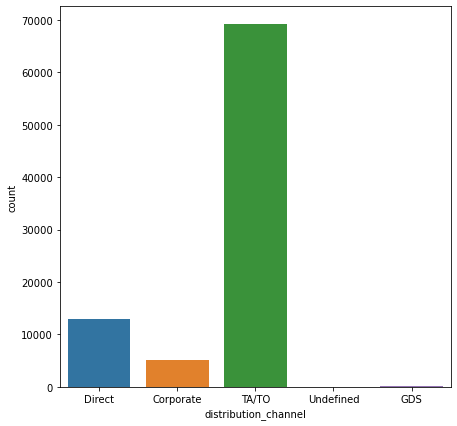

In [63]:
sns.countplot(x='distribution_channel',data=df)
plt.show()

#### We see that that among all distribution channels Travel Agents and Tour Agents have the highest number of bookings. This could indicate tie ups of the hotels and tour operators and travel agents.

In [64]:
tbl=pd.crosstab(df.distribution_channel,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
distribution_channel,,,
Corporate,4429,648,5077
Direct,11063,1925,12988
GDS,145,36,181
TA/TO,47720,21408,69128
Undefined,1,4,5
All,63358,24021,87379


In [65]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
distribution_channel,,,,
Corporate,4429,648,5077,12.763443
Direct,11063,1925,12988,14.821374
GDS,145,36,181,19.889503
TA/TO,47720,21408,69128,30.968638
Undefined,1,4,5,80.000000
All,63358,24021,87379,27.490587


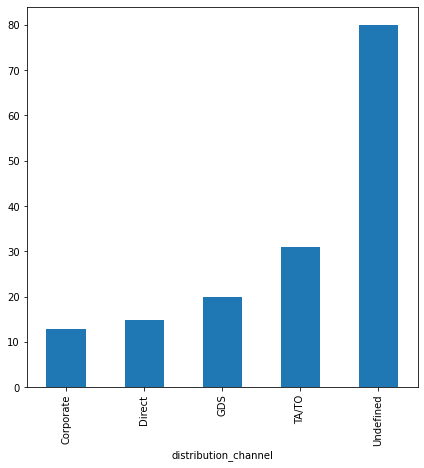

In [66]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.show()

#### We see that undefined distribution channel has the highest cancellation percentage. But there are only 5 records of undefined distribution channel. Among the defined distribution channels Travel agents and tour operators seem to have the highest cancellation rates. Corporate bookings have the least cancellation rates among all the distribution channels.

## Column: is_repeated_guest

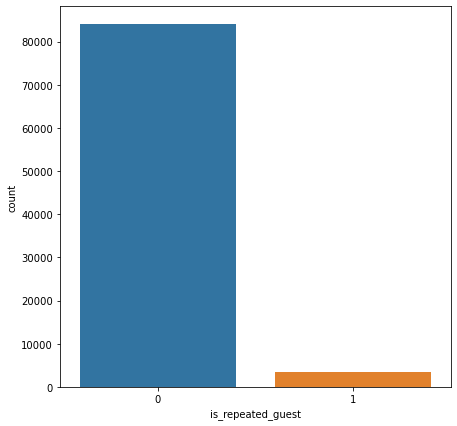

In [67]:
sns.countplot(x='is_repeated_guest',data=df)
plt.show()

#### We see that very few records are of customers that are repeated guests.

In [68]:
tbl=pd.crosstab(df.is_repeated_guest,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
is_repeated_guest,,,
0,60204,23760,83964
1,3154,261,3415
All,63358,24021,87379


In [69]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
is_repeated_guest,,,,
0,60204,23760,83964,28.297842
1,3154,261,3415,7.642753
All,63358,24021,87379,27.490587


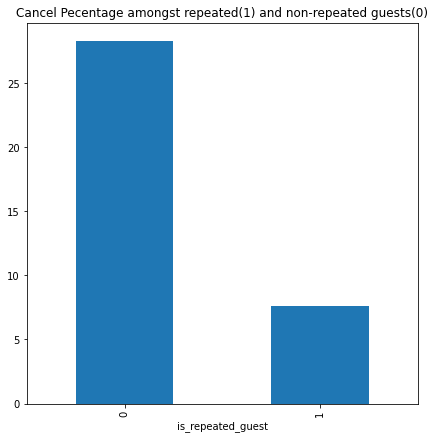

In [70]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.title('Cancel Pecentage amongst repeated(1) and non-repeated guests(0)')
plt.show()

#### We see that non repeated guests have a higher rate of cancellation compared to repeated guests.

## Column: previous_cancellations

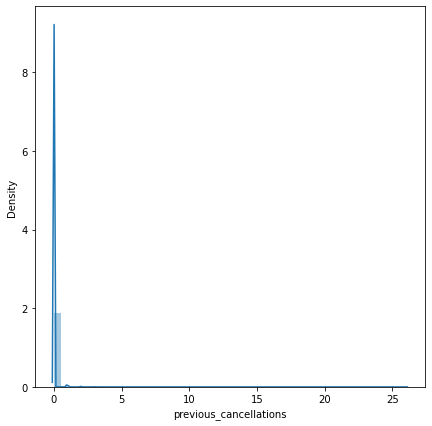

In [71]:
sns.distplot(df.previous_cancellations)
plt.show()

#### We see that most of the customers do not have any previous cancellations. This could also be because most of the customers are non-repeated guests. We also observe records where with a higher number of previous cancellations.

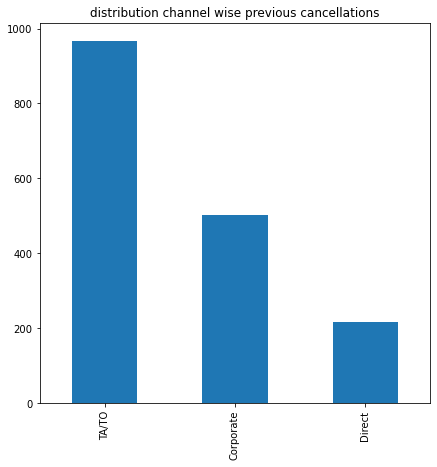

In [72]:
df.loc[df.previous_cancellations>0]['distribution_channel'].value_counts().plot.bar()
plt.title('distribution channel wise previous cancellations')
plt.show()

#### We see that the highest number of previous cancellations are from travel agents and tour operators. This indicates that travel agents and tour operators have a habit of bulk booking and reserving the rooms before approaching travellers.

## Column: previous_bookings_not_cancelled

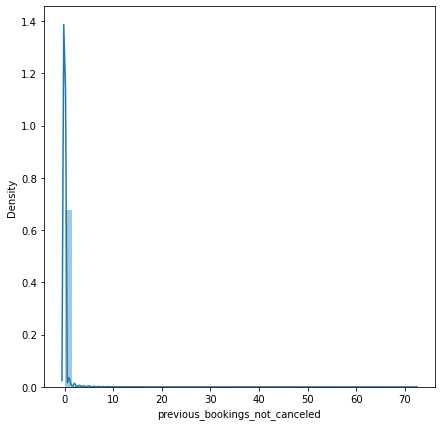

In [73]:
sns.distplot(df.previous_bookings_not_canceled)
plt.show()

#### From the above density plot we see that most of the bookings are of customers with 0 previous cancellations. There records indicating higher numbers. We would explore them further

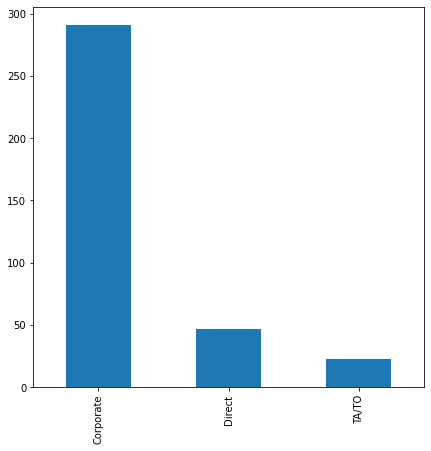

In [74]:
df.loc[df.previous_bookings_not_canceled>10]['distribution_channel'].value_counts().plot.bar()
plt.show()

#### We see that amongst the booking with higher number non-cancelled previous bookings most of them are from the corporate sector. It seems that the hotel reserves bookings under the corporate name but considers the individuals representing these corporates as seperate guests when considering they are repeated guests or not. Hence we see some corporate records with non-repeated guests but a a large number of non-cancelled previous bookings

## Column: Reserved room type

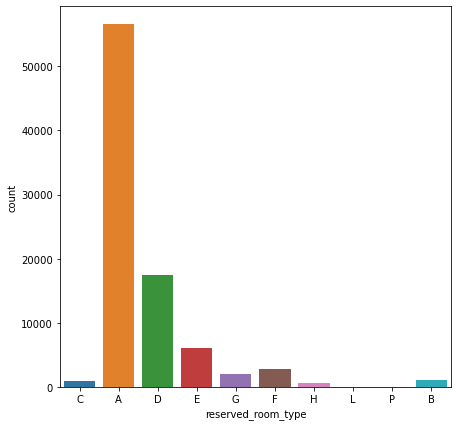

In [75]:
sns.countplot(x='reserved_room_type',data=df)
plt.show()

#### We see that hotel room of type A seems to be the most commonly booked room type. This room could be the most economical room type available at the hotels. We also see that there are very few records of room type L and P. These rooms could be luxury rooms and luxury suites.

In [76]:
tbl=pd.crosstab(df.reserved_room_type,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
reserved_room_type,,,
A,41852,14684,56536
B,681,318,999
C,619,296,915
D,12162,5236,17398
E,4400,1648,6048
F,1972,851,2823
G,1315,737,2052
H,353,243,596
L,4,2,6


In [77]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']

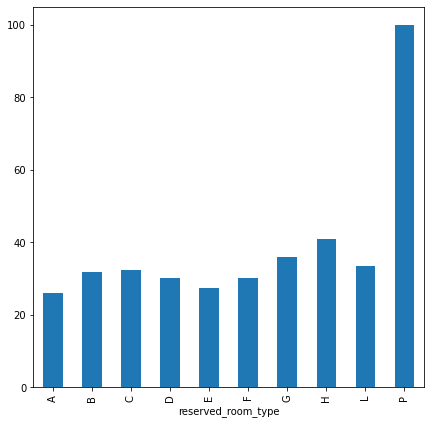

In [78]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.show()

#### We see that room type P has the highest cancellation rate. But P and L have 12 records together. Among Others H seems to be having the highest cancellation percentage. We also draw a similar inference from assigned room type

In [79]:
# Number of records where assigned room type was not same as reserved room type
df.loc[df.reserved_room_type!=df.assigned_room_type].shape

(13106, 32)

#### We see that there are 13,106 bookings where the customers were not able to get their reserved room type This indicates the presence of overbooking in the case of these hotels

## Column: Booking changes

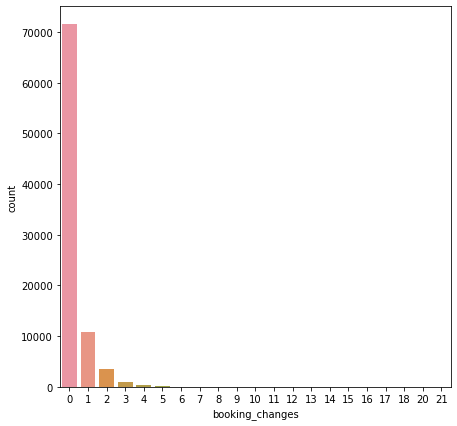

In [80]:
sn s.countplot(x='booking_changes',data=df)
plt.show()

#### We see that most records do not make any kind of booking changes to their reservations. There are records with a high number of booking changes.

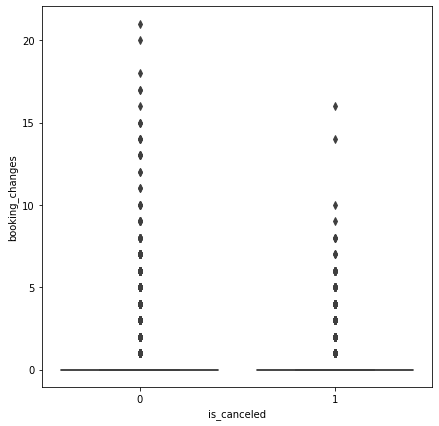

In [81]:
sns.boxplot(x='is_canceled',y='booking_changes',data=df)
plt.show()

#### We see that non-cancelled booking have a higher number of booking changes

## Column: Deposit Type

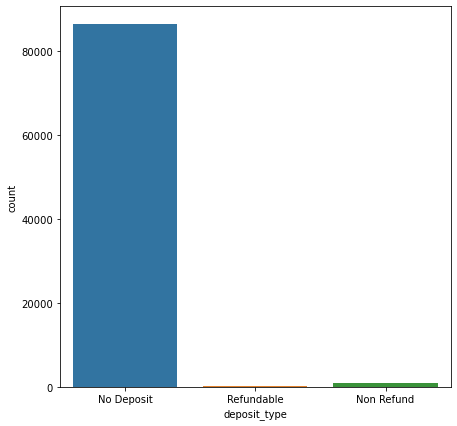

In [82]:
sns.countplot(x='deposit_type',data=df)
plt.show()

#### We see that most of the bookings have been made with no deposits, with very few bookings made refundable and non-refundable

In [83]:
tbl=pd.crosstab(df.deposit_type,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
deposit_type,,,
No Deposit,63222,23012,86234
Non Refund,55,983,1038
Refundable,81,26,107
All,63358,24021,87379


In [84]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']

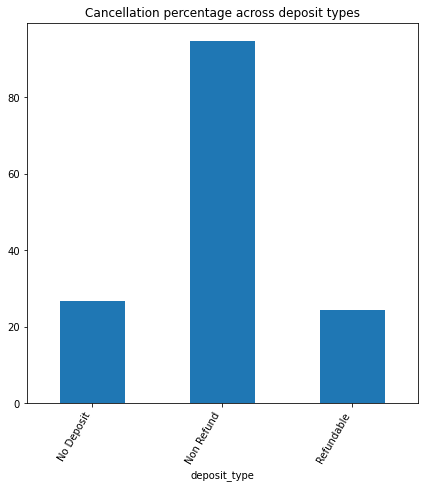

In [85]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.xticks(rotation=60,ha='right')
plt.title('Cancellation percentage across deposit types')
plt.show()

#### From the above analysis of the column we infer that, absurdly there is a huge percentage of cancellations in bookings done on non-refundable deposit types. To investigate, we read the paper 'Big Data in Hotel Revenue Management: Exploring Cancellation Drivers to Gain Insights Into Booking Cancellation Behavior.' We found out that when analysing the deposit type columns with the country of origins, a trend could be found. Most of these records of Asiatic and African countries where Non-refundable deposit type was mentioned happened to be done through OTA using false or invalid credit card details. These bookings are issued as support for requests for visas to enter the country (a hotel booking is mandatory for applying for a Portuguese entry visa). To quote from the paper itself: "As an example, through analysis of the “Nonrefundable” (DepositType) canceled bookings in some Asiatic countries (Country) and from certain distribution channels (DistributionChannel and Agent), it is possible to understand why so many “Nonrefundable” bookings are canceled. These bookings are usually made through OTA using false or invalid credit card details. These bookings are issued as support for requests for visas to enter the country (a hotel booking is mandatory for applying for a Portuguese entry visa).After failing to charge the customer’s credit card, the hotel identifies these bookings as “fake” and contacts the customer; however, during the time required to verify these bookings, they contribute negatively to demand forecast and demand-management decisions."  

## Column: Agent

In [86]:
df.agent.value_counts()

Agent       75190
No agent    12189
Name: agent, dtype: int64

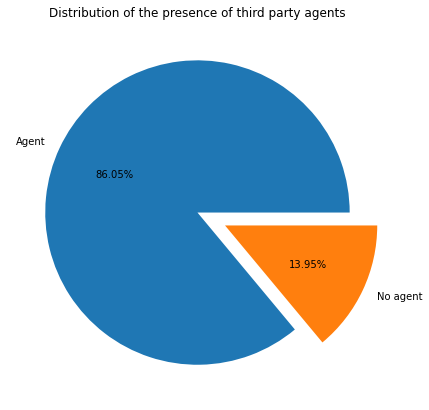

In [87]:
plt.pie(x=df.agent.value_counts().values,labels=df.agent.value_counts().index,explode=[0,0.2],autopct='%.2f%%')
plt.title('Distribution of the presence of third party agents')
plt.show()

#### We see that 86% bookings were done through third party agents while only 13% bookings were done through other sources. This is quite obvious with the strong presence of tour operators and travel agents, indicated by the distribution of market_segment and distribution channel columns

In [88]:
tbl=pd.crosstab(df.agent,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
agent,,,
Agent,52726,22464,75190
No agent,10632,1557,12189
All,63358,24021,87379


In [89]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
agent,,,,
Agent,52726,22464,75190,29.876313
No agent,10632,1557,12189,12.773812
All,63358,24021,87379,27.490587


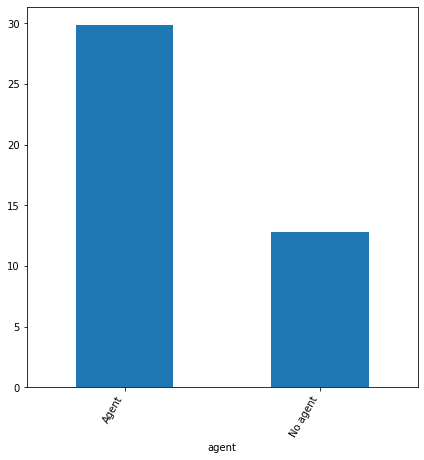

In [90]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that the cancellation percentage is considerable higher in bookings made through third party agents compared to direct bookings

## Column: Company

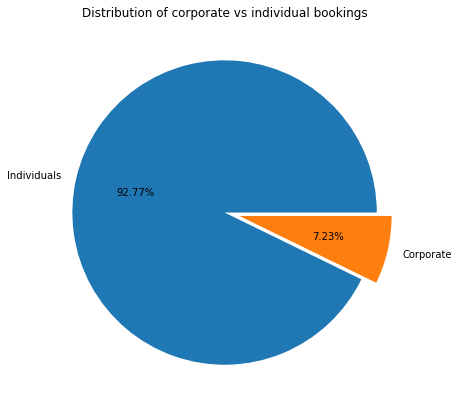

In [91]:
plt.pie(x=df.company.value_counts().values,labels=df.company.value_counts().index,explode=[0,0.1],autopct='%.2f%%')
plt.title('Distribution of corporate vs individual bookings')
plt.show()

#### We see that 92% of the bookings are done by individuals compared 7% by corporates. But this contradicts the strong presence of the Corporate sector in distribution and market segment area. One reason for this could be that most of the bookings were done on corporate benefits by employees and the reservation was done in the name of the company.

In [92]:
tbl=pd.crosstab(df.company,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
company,,,
Corporate,5555,763,6318
Individuals,57803,23258,81061
All,63358,24021,87379


In [93]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']

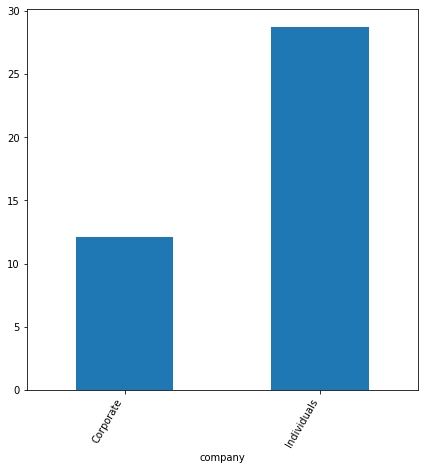

In [94]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that only around 12% of corporate bookings are cancelled compared to around 29% in individuals

## Column: customer_type

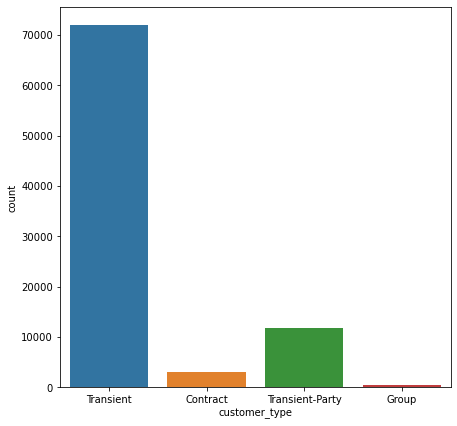

In [95]:
sns.countplot(x='customer_type',data=df)
plt.show()

#### We see that most number of bookings are from transient customers, meaning they are staying for less than 30 consecutive days.

## Column: adr(Average Daily Rate)

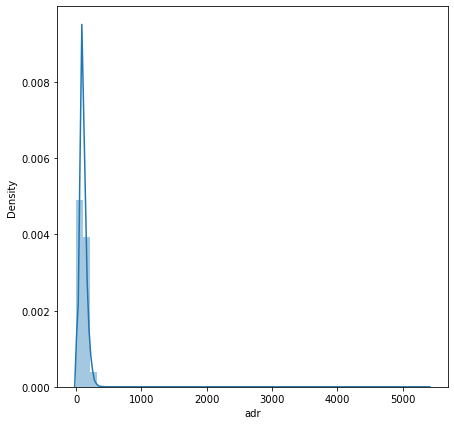

In [96]:
sns.distplot(df.adr)
plt.show()

#### We notice that most records have low adr, going upto a few hundreds. There is only one record with adr above 1000, which was a non-refund deposit type and a cancelled booking. This could be the deposit money counted into in adr

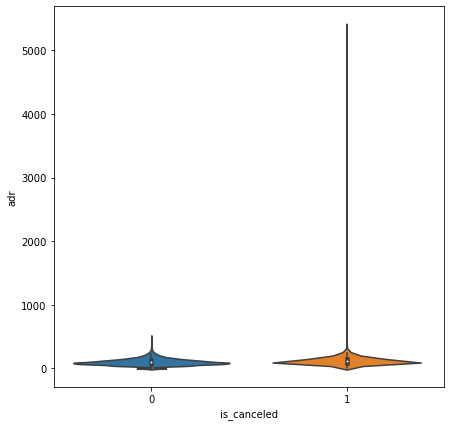

In [97]:
sns.violinplot(x='is_canceled',y='adr',data=df)
plt.show()

#### We notice that there are similar trends in cancelled and non-cancelled bookings, with the max adr being registered in cancelled bookings

## Column: required Car parking spaces

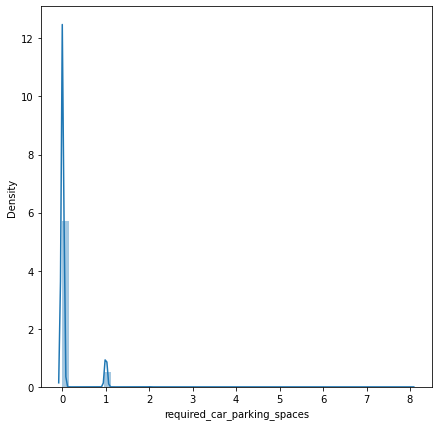

In [98]:
sns.distplot(df.required_car_parking_spaces)
plt.show()

#### We notice that most of the records require no or atmost 1 car parking spaces, though there are records that show more number of parking spaces. This could be families travelling together and larger business trips.

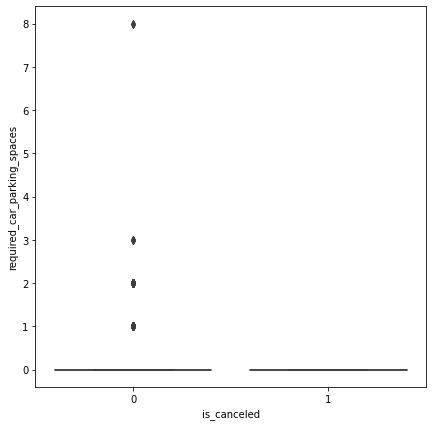

In [99]:
sns.boxplot(x='is_canceled',y='required_car_parking_spaces',data=df)
plt.show()

#### We see that non-cancelled bookings required more number of car parking spaces compared to cancelled bookings

## Column: Total of special requests

In [ ]:
pip install tuttle

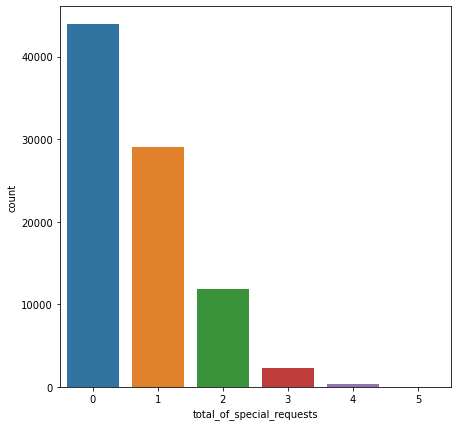

In [100]:
sns.countplot(x='total_of_special_requests',data=df)
plt.show()

#### We see that most number of people do not make any kind of special requests for their bookings. Usually, if any special requests are made, they are limited to 1 or 2 special requests. There are records though which show the number of special requests being as 4 or 5

In [101]:
tbl=pd.crosstab(df.total_of_special_requests,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
total_of_special_requests,,,
0,29311,14571,43882
1,22510,6502,29012
2,9297,2515,11812
3,1920,397,2317
4,286,34,320
5,34,2,36
All,63358,24021,87379


In [102]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']

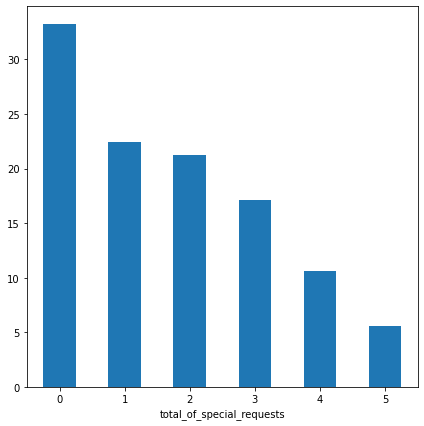

In [103]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.xticks(rotation=0)
plt.show()

#### From above we see that the more number of special requests a customer makes less likely he is to cancel his booking.

## Conclusion From the Exploratory Data Analysis
* We saw that there was 23% cancellation rate in Resort hotel vs around 30% cancellation rate across City Hotel. This could indicate the presence of overbooking in City Hotel. Management insights need to be taken to identify the cause and steps need to be taken accordingly.
* We observed that bookings with higher estimated lead time, on average, have a higher chance of cancellation. Steps to be extra vigilant towards longer leadt time bookings need to be taken.
* We observed that the cancellation rates have consistently increased with each passing year. There is clearly some kind of customer disatisfaction. Customer feedback could be taken to adress these issues.
* Both the hotels need to focus on the months of July and August, these 2 months have the highest number of bookings out of all months. Discounts and and offers could be given to avoid customers cancelling their bookings in these months.
* We see that most people order for a Bed and Breakfast meal package. Very few people go for a full board meal package. This could indicate the presence of popular restaurents around the hotels. A large number of people have ordered a no meal package as well.
* Most of the bookings seem to be from European countries. We could focus more on these to reduce the number of cancellations.
* We observed that most of the bookings are made through Online Travel Agents. Contacting said travel agents and setting up contracts between the hotel and these agents could be a very profitable move.
* We also need to dwelve into reasons to check why there are so few repeated guests in the hotels.
* We see that the cancellation percentage of a non-repeated guests is considerably higher compared to a repeated guest. This could indicate a lowern customer statisfaction. Customer feedback is again the best option here.
* More vigilant inspections should be made towards non-refundable deposit types, becaue of the false details given to them for entry visas.
* Transient bookings seem to be the most frequent in number.
* We see that non-cancelled bookings required more number of car parking spaces compared to cancelled bookings.

# Statistical Tests

#### We will be doing some statistical tests to confirm or disregard some of our assumptions about the data. The significance level for all the test would be taken as 0.05

## Column: hotel

### Null Hypothesis: The cancellation rate across both types of hotels is equal.
### Alternate Hypothesis: The cancellation rate across both types of hotels is unequal

In [104]:
# For this test we will be using chi2_contingency test
# First we need to create the required crosstab
tbl=pd.crosstab(df.hotel,df.is_canceled)
tbl

is_canceled,0,1
hotel,,
City Hotel,37373,16047
Resort Hotel,25985,7974


In [105]:
# Statistical test
statistic,pvalue,dof,expected=stats.chi2_contingency(tbl)
print('Pvalue of the test=',pvalue)

Pvalue of the test= 2.3836243016997826e-99


#### We see that the pvalue for our test is extremely small compared to our significance level. Hence, we have to reject our null hypothesis. In conclusion, the rate of cancellation across both types hotels is different

## Column: lead_time

### Null Hypothesis: The average lead time across cancelled and non cancelled bookings is equal
### Alternate Hypothesis: The average lead time across cancelled and non cancelled bookings is unequal

In [106]:
# For this test we would be using two sample t-test(independent)
# For this we need to create two different samples, one for cancelled bookings and one for non-cancelled bookings
cancelled_sample=df.loc[df.is_canceled==1,'lead_time']
non_cancelled_sample=df.loc[df.is_canceled==0,'lead_time']

In [107]:
# Statistical test
print('Pvalue for our test=',stats.ttest_ind(cancelled_sample,non_cancelled_sample)[1])

Pvalue for our test= 0.0


#### We see that the pavlue for our test is zero. Hence, we have to reject our null hypothesis. In conclusion, the lead time across both cancelled and non-cancelled bookings is different on average

### Null Hypothesis: The average lead time across both types of hotels is equal
### Alternate Hypothesis: The average lead time across both types of hotels in unequal

In [108]:
# For this test we would be using independent 2 sample ttest
# For this we need to create two samples one for resort hotel and one for city hotel
city_sample=df.loc[df.hotel=='City Hotel','lead_time']
resort_sample=df.loc[df.hotel=='Resort Hotel','lead_time']

In [109]:
# Statistical test
print('Pvalue for our test=',stats.ttest_ind(city_sample,resort_sample)[1])

Pvalue for our test= 1.0599202483394969e-21


#### We see that the pvalue for our test is extremely small compared to our significance level. Hence, we have to reject our null hypothesis. In conclusion, the average lead time is unequal across both types of hotels.

## Column: arrival_date_year

### Null Hypothesis: The cancellation rates across all years is equal
### Alternate Hypothesis: The cancellation rates across all years in unequal

In [110]:
# For this test we would be using the chi2 ciontingency test
# First we need to create the required crosstab
tbl=pd.crosstab(df.arrival_date_year,df.is_canceled)
tbl

is_canceled,0,1
arrival_date_year,,
2015,10605,2702
2016,31178,11207
2017,21575,10112


In [111]:
# Statistical test
statistic,pvalue,dof,expected=stats.chi2_contingency(tbl)
print('The Pvalue for our test=',pvalue)

The Pvalue for our test= 3.820853260100682e-148


#### We see that the pvalue for our test is extremely small compared to our significance level. Hence we have to reject our null hypothesis. In conclusion, the rate of cancellation is different across all years

## Column: arrival_date_month

### Null Hypothesis: The cancellation rates are equal across all months in the arrival date
### Alternate Hypothesis: The cancellation rates are unequal across all months in the arrival date

In [112]:
# For this test we would be using the chi2 contingency test
# First we need to make the required crosstab
tbl=pd.crosstab(df.arrival_date_month,df.is_canceled)
tbl

is_canceled,0,1
arrival_date_month,,
April,5498,2409
August,7633,3621
December,3751,1378
February,4682,1415
January,3654,1038
July,6858,3198
June,5411,2353
March,5681,1830
May,5912,2442


In [113]:
# Statistical test
statistic,pvalue,dof,expected=stats.chi2_contingency(tbl)
print('The Pvalue for the given test=',pvalue)

The Pvalue for the given test= 3.5271569640903227e-130


#### We see that the pvalue for the given test is extremely small compared to our significance level. Hence we have to reject our null hypothesis. In conclusion, the cancellation rates is unequal across all the months in the arrival dates

## Column: arrival_date_week_number

### Null Hypothesis: The cancellation rates are equal across all weeks of an year
### Alternate Hypothesis: The cancellation rates are unequal across all weeks of an year

In [114]:
# For this test we would be using the chi2 contingency test
# First we need to make the required crosstab
tbl=pd.crosstab(df.arrival_date_week_number,df.is_canceled)
tbl

is_canceled,0,1
arrival_date_week_number,,
1,617,245
2,729,216
3,819,230
4,905,220
5,859,242
6,1013,286
7,1246,384
8,1164,360
9,1232,347


In [115]:
# statistical test
statistic,pvalue,dof,expected=stats.chi2_contingency(tbl)
print('The Pvalue of the given test=',pvalue)

The Pvalue of the given test= 3.959024427423707e-124


#### We see that the pvalue for our test is extremely small compared to our significance level. Hence we have to reject our null hypothesis. In conclusion, the cancellation rates are unequal across all weeks of an year

## Column: arrival_date_day_of_month

### Null Hypothesis: The rate of cancellations is equal across all days of a month
### Alternate Hypothesis: The rate of cancellations is unequal across all days of a month

In [116]:
# For this test we would be using chi2_contingency test
# For this we would be first make the required crosstab
tbl=pd.crosstab(df.arrival_date_day_of_month,df.is_canceled)
tbl

is_canceled,0,1
arrival_date_day_of_month,,
1,1951,819
2,2208,808
3,2037,797
4,2038,762
5,2184,795
6,2080,724
7,1942,760
8,1998,810
9,2129,749


In [117]:
# Statistical test
statistic,pvalue,dof,expected=stats.chi2_contingency(tbl)
print('The Pvalue for the given test=',pvalue)

The Pvalue for the given test= 7.328504130894356e-05


#### We see that our pvalue is less than our significance level for the given test. Hence we have to reject the null hypothesis. In conclusion, the cancellation rates are unequal across all the days of a month

## Column: stays_in_weekend_nights

### Null Hypothesis: The average proposed stays_in_weekend nights is equal in both cancelled and non-cancelled bookings
### Alternate Hypoithesis: The average proposed stays_in_weekend nights is unequal in both cancelled and non-cancelled bookings

In [118]:
# For this test we would be using the 2 sample independent t-test
# For this we will have to create 2 samples, one for cancelled bookings and one for non-cancelled bookings
cancelled_sample=df.loc[df.is_canceled==1,'stays_in_weekend_nights']
non_cancelled_sample=df.loc[df.is_canceled==0,'stays_in_weekend_nights']

In [119]:
# Statistical test
print('Pvalue for the given test=',stats.ttest_ind(cancelled_sample,non_cancelled_sample)[1])

Pvalue for the given test= 5.050787888240172e-71


#### We see that our pvalue for the given test is extremely small compared to our significance level. Hence we have to reject our null hypothesis. In conclusion, the average number of proposed weekend stays is unequal in cancelled and non-cancelled bookings

### Null hypothesis: The average number of weekend stays in resort hotel and city hotels are equal
### Alternate Hypothesis: The average number of weekend stays in resort hotel and city hotels are unequal

In [120]:
# For this test we will use 2 sample independent t-test
# For this we need to create 2 samples, one for resort hotel and the other for city hotel
city_sample=df.loc[df.hotel=='City Hotel','stays_in_weekend_nights']
resort_sample=df.loc[df.hotel=='Resort Hotel','stays_in_weekend_nights']

In [121]:
# Statistical test
print('The Pvalue for the given test=',stats.ttest_ind(city_sample,resort_sample)[1])

The Pvalue for the given test= 0.0


#### We see that the pvalue for our test is coming out to be 0. Thus we have to reject our null hypothesis. In conclusion, the average number of weekend stays is unequal for city and resort hotels

## Column: stays_in_week_nights

### Null Hypothesis: The average number of proposed stays in week nights is equal across cancelled and non-cancelled bookings
### Alternate Hypothesis: The average number of proposed stays in week nights is unequal across cancelled and non-cancelled bookings

In [122]:
# For this test we would apply 2 sample independent t-test
# For this we would need to create 2 different samples, one for cancelled bookings and the other for non-cancelled bookings
cancelled_sample=df.loc[df.is_canceled==1,'stays_in_week_nights']
non_cancelled_sample=df.loc[df.is_canceled==0,'stays_in_week_nights']

In [123]:
# Statistical test
print('The Pvalue for the given test=',stats.ttest_ind(cancelled_sample,non_cancelled_sample)[1])

The Pvalue for the given test= 3.8996584143612615e-133


#### We see that the pvalue for our test is extremely small compared to our significance level. Hence we have to reject our null hypothesis. In conclusion, the average number of proposed stays in week nights is unequal in cancelled and non-cancelled bookings

### Null Hypothesis: The average number of proposed stays in week nights is equal in resort hotels and city hotels
### Alternate Hypothesis: The average number of proposed stays in week nights is unequal in resort hotels and city hotels

In [124]:
# For this test we would use 2 sample independent t-test
# For this we need to create 2 different samples
resort_sample=df.loc[df.hotel=='Resort Hotel','stays_in_week_nights']
city_sample=df.loc[df.hotel=='City Hotel','stays_in_week_nights']

In [125]:
# Statistical test
print('The Pvalue of the given test=',stats.ttest_ind(city_sample,resort_sample)[1])

The Pvalue of the given test= 0.0


#### We see that the pvalue for our test is coming out to be 0. Hence, we have to reject our null hypothesis. In conclusion, the average number of proposed stays in week nights is unequal in resort hotel and city hotel

## Column: adults

### Null Hypothesis: The average number of adults in cancelled bookings and non-cancelled bookings is equal
### Alternate Hypothesis: The average number of adults in cancelled and non-cancelled bookings in unequal

In [126]:
# For this test we would use the 2 sample independent t-test
# For that we would need to create two samples, one for cancelled and other for non-cancelled bookings
cancelled_sample=df.loc[df.is_canceled==1,'adults']
non_cancelled_sample=df.loc[df.is_canceled==0,'adults']

In [127]:
# Statistical test
print('The Pvalue for the given test=',stats.ttest_ind(cancelled_sample,non_cancelled_sample)[1])

The Pvalue for the given test= 1.7516350870678043e-129


#### We see that the pvalue of the given test is extremely small compared to our significance level. Hence, we have to reject our null hypothesis. In conclusion, the average number of adults in cancelled and non-cancelled bookings is unequal.

### Null Hypothesis: The average number of adults in resort and city hotel is equal
### Alternate Hypothesis: The average number of adults in resort and city hotel in unequal

In [128]:
# For this test we would use the 2 sample independent t-test
# For this we need to create two samples, one for city hotel and one for resort hotel
city_sample=df.loc[df.hotel=='City Hotel','adults']
resort_sample=df.loc[df.hotel=='Resort Hotel','adults']

In [129]:
# Statistical test
print('The Pvalue for the given test=',stats.ttest_ind(city_sample,resort_sample)[1])

The Pvalue for the given test= 0.7679037693684141


#### We see that the pvalue for the given test is greater than our significance level. Hence, we fail to reject the null hypothesis. In conclusion, the average number of adults in city hotel and resort hotel is equal

## Column: babies

### Null Hypothesis: The average number of babies in cancelled bookings and non-cancelled bookings is equal
### Alternate Hypothesis: The average number of babies in cancelled bookings and non-cancelled bookings in unequal

In [130]:
# For this test we would use 2 sample independent t-test
# For this we would need to create 2 samples, one for cancelled bookings and one for non-cancelled bookings
cancelled_sample=df.loc[df.is_canceled==1,'babies']
non_cancelled_sample=df.loc[df.is_canceled==0,'babies']

In [131]:
# Statistical test
print('The Pvalue of the given test=',stats.ttest_ind(cancelled_sample,non_cancelled_sample)[1])

The Pvalue of the given test= 6.569969391571349e-10


#### We see that the pvalue for the given test is extremely small compared to our significance level. Hence, we have to reject the null hypothesis. In conclusion, the average number of babies in cancelled and non-cancelled bookings is unequal.

### Null Hypothesis: The average number of babies in resort hotel and city hotel is equal
### Alternate Hypothesis: The average number of babies in resort hotel and city hotel is unequal

In [132]:
# For this test we would apply 2 sample independent t-test
# For this we need to create 2 samples, one for city hotel and the other for resort hotel
city_sample=df.loc[df.hotel=='City Hotel','babies']
resort_sample=df.loc[df.hotel=='Resort Hotel','babies']

In [133]:
# Statistical test
print('The Pvalue of the given test=',stats.ttest_ind(city_sample,resort_sample)[1])

The Pvalue of the given test= 1.0095523186380656e-29


#### We see that the pvalue for the given test is extremely small compared to our significance level. Hence, we have to reject the null hypothesis. In conclusion, the average number of babies in city hotel and resort hotel is unequal

## Column: children

### Null hypothesis: The average number of children in cancelled and non-cancelled bookings is equal
### Alternate hypothesis: The average number of children in cancelled and non-cancelled bookings in unequal

In [134]:
# For this test we woulde use the 2 sample independent t-test
# For this we would need to create 2 samples, one for cancelled bookings and one for non-cancelled bookings
cancelled_sample=df.loc[df.is_canceled==1,'children']
non_cancelled_sample=df.loc[df.is_canceled==0,'children']

In [135]:
# Statistical test
print('The Pvalue for the given test=',stats.ttest_ind(cancelled_sample,non_cancelled_sample)[1])

The Pvalue for the given test= 1.942432211093954e-88


#### We see that the pvalue for the given test is extremely small compared to our significance level. Hence, we have to reject the null hypothesis. In conclusion, the average number of children in cancelled and non-cancelled bookings in unequal

### Null Hypothesis: The average number of children is equal in both resort and city hotel
### Alternate Hypothesis: The average number of children is unequal in resort and city hotel

In [136]:
# For this test we would do 2 sample independent t-test
# For this we would need to make to samples, one for city hotel and the other for resort hotel
city_sample=df.loc[df.hotel=='City Hotel','children']
resort_sample=df.loc[df.hotel=='Resort Hotel','children']

In [137]:
# Statistical test
print('The Pvalue of the given test=',stats.ttest_ind(city_sample,resort_sample)[1])

The Pvalue of the given test= 3.204779523780442e-08


#### We see that the pvalue for the given test is less than our significance level. Hence we have reject our null hypothesis. In conclusion, the average number of children is unequal in city and resort hotel

## Column: meal

### Null Hypothesis: The cancellation rate is equal across all selected meal types
### Alternate Hypothesis: The cancellation rate is unequal across all selected meal types

In [138]:
# For this test we would use the chi2 contingency test
# For this we would need to make the required crosstab
tbl=pd.crosstab(df.meal,df.is_canceled)
tbl

is_canceled,0,1
meal,,
BB,49921,18044
FB,260,99
HB,6634,2449
SC,6133,3347
Undefined,410,82


In [139]:
# Statistical Test
statistic,pvalue,dof,expected=stats.chi2_contingency(tbl)
print('The pvalue of the given test=',pvalue)

The pvalue of the given test= 1.1176601582939096e-74


#### We see that the pvalue of the give test is extremely small compared to our significance level. Hence, we have to reject our null hypothesis. In conclusion, the cancellation rate is unequal across all meal types.

## Column: country

### Null hypothesis: The cancellation rate is equal across all country regions
### Alternate hypothesis: The cancellation rate is unequal across all country regions

In [140]:
# For this test we would use the chi2 contingency test
# For this we would need to make the required crosstab
tbl=pd.crosstab(df.country,df.is_canceled)
tbl

is_canceled,0,1
country,,
Africa,559,436
Asia,2286,1141
Australia,286,92
Europe,56573,20944
North America,1531,474
Others,106,53
South America,1599,847
Unknown,418,34


In [141]:
# Statistical test
statistic,pvalue,dof,expected=stats.chi2_contingency(tbl)
print('The Pvalue of the given test=',pvalue)

The Pvalue of the given test= 2.2744723334853746e-76


#### We see that the pvalue for the given test extremely small compared to our significance level. Hence, we have to reject our null hypiothesis. In conclusion, the cancellation rates is different across all country regions

## Column: market_segment

### Null Hypothesis: The cancellation rate is equal across all market segments
### Alternate Hypothesis: The cancellationnrate is unequal across all market segments

In [142]:
# For this test we would use chi2 contingency test
# For this we would have to create the required crosstab
tbl=pd.crosstab(df.market_segment,df.is_canceled)
tbl

is_canceled,0,1
market_segment,,
Aviation,182,45
Complementary,614,88
Corporate,3698,510
Direct,10067,1737
Groups,3606,1335
Offline TA/TO,11822,2060
Online TA,33369,18244
Undefined,0,2


In [143]:
# Statistical test 
statistic,pvalue,dof,expected=stats.chi2_contingency(tbl)
print('The Pvalue for the given test=',pvalue)

The Pvalue for the given test= 0.0


#### We see that the pvalue for the given test is coming our to be zero. Hence we have to reject the null hypothesis. In conclusion, the cancellation rate is different across all market segments

## Column: distribution_channel

### Null hypothesis: The cancellation rate across all distribution channels is equal
### Alternate hypothesis: The cancellation rate across all distribution channels is unequal

In [144]:
# For this test we would use the chi2 contigency
# For this we would need to make the required crosstab
tbl=pd.crosstab(df.distribution_channel,df.is_canceled)
tbl

is_canceled,0,1
distribution_channel,,
Corporate,4429,648
Direct,11063,1925
GDS,145,36
TA/TO,47720,21408
Undefined,1,4


In [145]:
# Statistical test
statistic,pvalue,dof,expected=stats.chi2_contingency(tbl)
print('The Pvalue for the given test=',pvalue)

The Pvalue for the given test= 0.0


#### We see that the pvalue for the given test is coming out to be zero. Hence we have to reject the null hypothesis. In conclusion, the cancellation rate is unequal across all distribution channel

## Column: is_repeated_guest

### Null hypothesis: Cancellation rate is equal across both repeated and non-repeated guests
### Alternate hypothesis: Cancellation rate is unequal across both repeated and non-repeated guests

In [146]:
# For this test we will use the chi2 contingency test
# For this we would have to make the requred crosstab
tbl=pd.crosstab(df.is_repeated_guest,df.is_canceled)
tbl

is_canceled,0,1
is_repeated_guest,,
0,60204,23760
1,3154,261


In [147]:
# Statistical test
statistic,pvalue,dof,expected=stats.chi2_contingency(tbl)
print('The Pvalue for the given test=',pvalue)

The Pvalue for the given test= 1.5499137338466053e-154


#### We see that the pvalue for the given test is extremely small compared to our significance level. Thus we have to reject our null hypothesis. In conclusion, the cancellation rate is unequal in repeated and non-repeated guests

## Column: previous_cancellations

### Null hypothesis: The average number of previous cancellations is equal across cancelled and non-cancelled bookings
### Alternate hypothesis: The average number of previous cancellations is unequal across cancelled and non-cancelled bookings

In [148]:
# For this test we would use the 2 sample independent t-test
# For this we would need to make 2 different samples, one for cancelled bookings and the other for cancelled bookings
cancelled_sample=df.loc[df.is_canceled==1,'previous_cancellations']
non_cancelled_sample=df.loc[df.is_canceled==0,'previous_cancellations']

In [149]:
# Statistical test
print('The Pvalue for the given test=',stats.ttest_ind(cancelled_sample,non_cancelled_sample)[1])

The Pvalue for the given test= 2.4277913042193007e-52


#### We see that the pvalue for the given test is extremely small compared to our significance level. Hence, we have to reject our null hypothesis. In conclusion, the average number of previous cancellations is unequal across cancelled and non-cancelled bookings.

### Null Hypothesis: The average number of previous cancellations is equal across resort hotel and city hotel
### Alternate Hypothesis: The average number of previous cancellations is unequal across resort hotel and city hotel

In [150]:
# For this test we would be using the 2 sample indepenent t-test
# For this we would need to make 2 different samples, one for city hotel and the other for resort hotel
city_sample=df.loc[df.hotel=='City Hotel','previous_cancellations']
resort_sample=df.loc[df.hotel=='Resort Hotel','previous_cancellations']

In [151]:
# Statistical test
print('The Pvalue for the given test=',stats.ttest_ind(city_sample,resort_sample)[1])

The Pvalue for the given test= 7.57265759516137e-08


#### We see that the pvalue for the given test is smaller than our significance level. Hence, we have to reject our null hypothesis. In conclusion, the average number of previous cancellations is unequal across city hotel and resort hotel

## Column: previous_bookings_not_cancelled

### Null Hypothesis: The average number of non-canclled previous bookings in cancelled and non-cancelled bookings is equal
### Alternate Hypothesis: The average number of non-canclled previous bookings in cancelled and non-cancelled bookings is unequal

In [152]:
# For this test we would be using the 2 sample independent t-test
# For this we need to make two samples, one for cancelled bookings and one for non-cancelled bookings
cancelled_sample=df.loc[df.is_canceled==1,'previous_bookings_not_canceled']
non_cancelled_sample=df.loc[df.is_canceled==0,'previous_bookings_not_canceled']

In [153]:
# Statistical test
print('The Pvalue of the given test=',stats.ttest_ind(cancelled_sample,non_cancelled_sample)[1])

The Pvalue of the given test= 1.0480331213758925e-53


#### We see that the pvalue for the given test is extremely small compared to our significance level. Hence, we have to reject our null hypothesis. In conclusion, the average number of previous cancelleation is unequal in cancelled and non-cancelled bookings. 

### Null hypothesis: The average number of previous non-cancellations is equal in resort hotel and city hotel
### Alternate hypothesis: The average number of previous non-cancellations is unequal in resort hotel and city hotel

In [154]:
# For this test we would use the 2 sample independent t-test
# For this we need to create 2 samples, one for city hotel and one for resort hotel
city_sample=df.loc[df.hotel=='City Hotel','previous_bookings_not_canceled']
resort_sample=df.loc[df.hotel=='Resort Hotel','previous_bookings_not_canceled']

In [155]:
# Statistical test
print('The Pvalue for the given test=',stats.ttest_ind(city_sample,resort_sample)[1])

The Pvalue for the given test= 0.10868900375422666


#### We see that the pvalue of the given test is greater than the significance level of our test. Hence we fail to reject the null hypothesis. In conclusion, the average number of previous non-cancellations is equal across resort hotel and city hotel

## Column: reserved_room_type

### Null Hypothesis: The rate of cancellation is equal across all reserved room types
### Alternate Hypothesis: The rate of cancellation is unequal across all reserved room types

In [156]:
# For this test we would use the chi2 contingency test
# For this we need to make the required crosstab first
tbl=pd.crosstab(df.reserved_room_type,df.is_canceled)
tbl

is_canceled,0,1
reserved_room_type,,
A,41852,14684
B,681,318
C,619,296
D,12162,5236
E,4400,1648
F,1972,851
G,1315,737
H,353,243
L,4,2


In [157]:
# Statistical test
statistic,pvalue,dof,expected=stats.chi2_contingency(tbl)
print('The Pvalue for the given test=',pvalue)

The Pvalue for the given test= 1.2777981478948737e-58


#### We see that the pvalue for the given test is extremely small compared to our significance level. Hence we have to reject our null hypothesis. In, conclusion, the rate of cancellation is unequal across all reserved room types

## Column: assigned_room_type

### Null Hypothesis: The cancellation rate is equal across all categories of assigned room types
### Alternate Hypothesis: The cancellation rate in unequal across all categories of assigned room types

In [158]:
# For this test we would be using the chi2 contingency test
# For this we would have to make the required crosstab
tbl=pd.crosstab(df.assigned_room_type,df.is_canceled)
tbl

is_canceled,0,1
assigned_room_type,,
A,32121,14179
B,1421,399
C,1770,395
D,16998,5431
E,5497,1697
F,2733,894
G,1745,753
H,457,249
I,352,5


In [159]:
# Statistical test
statistic,pvalue,dof,expected=stats.chi2_contingency(tbl)
print('The Pvalue of the given test=',pvalue)

The Pvalue of the given test= 4.154934963089344e-161


#### We see that the pvalue for the given test is extremely small compared to our significance level. Hence we have to reject our null hypothesis. In conclusion, the cancellation rate is unequal across all assigned room types.

## Column: booking_changes

### Null Hypothesis: The average number of booking changes in cancelled and non-cancelled bookings is equal.
### Alternate Hypothesis: The average number of booking changes in cancelled and non-cancelled bookings is unequal

In [160]:
# For this test we would be using the independent 2-sample ttest
# For this we need to create two samples, one for cancelled and the other for non-cancelled
cancelled_samp=df.loc[df.is_canceled==1,'booking_changes']
non_cancelled_samp=df.loc[df.is_canceled==0,'booking_changes']
print('Pvalue for the given test is=',stats.ttest_ind(cancelled_samp,non_cancelled_samp)[1])

Pvalue for the given test is= 2.0816051140780235e-169


#### We see that pvalue for the given test extremely small compared to our significance value. Hence we have to reject our null hypothesis. In conclusion, the average number of booking changes in cancelled and non-cancelled bookings is unequal.

## Column: deposit_type

### Null Hypothesis: The rate of cancellation across all deposit types is equal
### Alternate Hypothesis: the rate of cancellation across all deposit types is unequal.

In [161]:
# For this test we would be using the chi2_contingency test
# For this we need to makew the required crosstab
tbl=pd.crosstab(df.deposit_type,df.is_canceled)
tbl

is_canceled,0,1
deposit_type,,
No Deposit,63222,23012
Non Refund,55,983
Refundable,81,26


In [162]:
statistic,pvalue,dof,exp=stats.chi2_contingency(tbl)
print('The Pvalue for the given test=',pvalue)

The Pvalue for the given test= 0.0


#### We see that the pvalue for our test is coming out to be zero. Hence we have to reject our null hypothesis. In conclusion, the rate of cancellation is unequal across all deposit types.

## Column: Agent

### Null Hypothesis: The rate of cancellations through agent and direct is equal
### ALternate Hypothesis: The rate of cancellations through agent and direct is unequal

In [163]:
# For this test we would be using the chi2_contingency test
# For this we need to makew the required crosstab
tbl=pd.crosstab(df.agent,df.is_canceled)
tbl

is_canceled,0,1
agent,,
Agent,52726,22464
No agent,10632,1557


In [164]:
statistic,pvalue,dof,exp=stats.chi2_contingency(tbl)
print('The Pvalue for the given test=',pvalue)

The Pvalue for the given test= 0.0


#### We see that the pvalue for our test is coming out to be zero. Hence we have to reject our null hypothesis. In conclusion, the rate of cancellations through agents and direct is unequal.

## Column: Company

### Null Hypothesis: The rate of cancellation across corporate and non-corporate bookings is equal
### Alternate Hypothesis: The rate of cancellation across corporate and non-corporate bookings is unequal

In [165]:
# For this test we would be using the chi2_contingency test
# For this we need to makew the required crosstab
tbl=pd.crosstab(df.company,df.is_canceled)
tbl

is_canceled,0,1
company,,
Corporate,5555,763
Individuals,57803,23258


In [166]:
statistic,pvalue,dof,exp=stats.chi2_contingency(tbl)
print('The Pvalue for the given test=',pvalue)

The Pvalue for the given test= 2.275732587343074e-178


#### We see that the pvalue for the given test is extremely small compared to our significance level. Hence we have to reject pur null hypothesis. In conclusion, the rate of cancellation across corporate and non-corporate bookings is unequal.

## Column: days_in_waiting_list

### Null Hypothesis: The average number of days in waiting list is equal across cancelled and non-cancelled bookings
### Alternate Hypotheis: The average number of days in waiting list is unequal across cancelled and non-cancelled bookings

In [167]:
# For this test we would be using the independent 2-sample ttest
# For this we need to create two samples, one for cancelled and the other for non-cancelled
cancelled_samp=df.loc[df.is_canceled==1,'days_in_waiting_list']
non_cancelled_samp=df.loc[df.is_canceled==0,'days_in_waiting_list']
print('Pvalue for the given test is=',stats.ttest_ind(cancelled_samp,non_cancelled_samp)[1])

Pvalue for the given test is= 0.18703674397911196


#### We see that the pvalue for the given test is greater than our significance level. Thus we fail to reject our null hypothesis. In conclusion, the average number of days in waiting list is equal across cancelled and non-cancelled bookings. Hence, this feature becomes an insignificant feature for us during the model bulding phase.

## Column: customer_type

### Null hypothesis: The rate of cancellation is equal across all customer types
### Alternate Hypothesis: The rate of cancellation is unequal across all customer types

In [168]:
# For this test we would be using the chi2_contingency test
# For this we need to makew the required crosstab
tbl=pd.crosstab(df.customer_type,df.is_canceled)
tbl

is_canceled,0,1
customer_type,,
Contract,2627,512
Group,490,54
Transient,50302,21668
Transient-Party,9939,1787


In [169]:
statistic,pvalue,dof,exp=stats.chi2_contingency(tbl)
print('The Pvalue for the given test=',pvalue)

The Pvalue for the given test= 1.1647517453237708e-305


#### We see that the pvalue for the given test is extremely small compared to our significance level. Thus we have to reject our null hypothesis. In conclusion, the rate of cancellation across all customer types is unequal.

## Column: adr

### Null Hypothesis: The average daily rate is equal across cancelled and non-cancelled bookings
### Alternate Hypothesis: The average daily rate is unequal across cancelled and non-cancelled bookings

In [170]:
# For this test we would be using the independent 2-sample ttest
# For this we need to create two samples, one for cancelled and the other for non-cancelled
cancelled_samp=df.loc[df.is_canceled==1,'adr']
non_cancelled_samp=df.loc[df.is_canceled==0,'adr']
print('Pvalue for the given test is=',stats.ttest_ind(cancelled_samp,non_cancelled_samp)[1])

Pvalue for the given test is= 0.0


#### We see that the pvalue for the given test is coming out to be zero. Hence, we have to reject our null hypothesis. In conclusion, the average daily rate is unequal across cancelled and non-cancelled bookings

## Column: required_car_parking_spaces

### Null Hypothesis: The average number of required car parking spaces is equal across cancelled and non-cancelled bookings
### Alternate Hypothesis: The average number of required car parking spaces is unequal across cancelled and non-cancelled bookings

In [171]:
# For this test we would be using the independent 2-sample ttest
# For this we need to create two samples, one for cancelled and the other for non-cancelled
cancelled_samp=df.loc[df.is_canceled==1,'required_car_parking_spaces']
non_cancelled_samp=df.loc[df.is_canceled==0,'required_car_parking_spaces']
print('Pvalue for the given test is=',stats.ttest_ind(cancelled_samp,non_cancelled_samp)[1])

Pvalue for the given test is= 0.0


#### We see that the pvalue for the given test coming out to be zero. Hence we have to reject our null hypothesis. In conclusion, the average number of required car parking spaces in unequal across cancelled and non-cancelled bookings

## Column: total_of_special_requests

### Null Hypothesis: The average number of special requests is equal across cancelled and non-cancelled bookings
### Alternate Hypothesis: The average number of special requests is unequal across cancelled and non-cancelled bookings

In [172]:
# For this test we would be using the independent 2-sample ttest
# For this we need to create two samples, one for cancelled and the other for non-cancelled
cancelled_samp=df.loc[df.is_canceled==1,'total_of_special_requests']
non_cancelled_samp=df.loc[df.is_canceled==0,'total_of_special_requests']
print('Pvalue for the given test is=',stats.ttest_ind(cancelled_samp,non_cancelled_samp)[1])

Pvalue for the given test is= 3.356152006637365e-280


#### We see that the pvalue for the given test is extremely small compared to our significance level. Hence we have to reject the null hypothesis. In conclusion, the average number of special requests is unequal across cancelled and non-cancelled bookings.

# Feature Selection and Engineering

In [173]:
# We observed that out of all the features we have one insignificant feature namely, days in waiting list
# So we would drop this variable from our model bulding
df.drop(columns='days_in_waiting_list',inplace=True)

In [174]:
# We also have two post-event columns, reservation_status and reservation_status_date
# To make a robust model we would have to drop these two columns as well
df.drop(columns=['reservation_status','reservation_status_date'],inplace=True)

In [175]:
# We will also drop rows where the booking is not cancelled but the party size is zero
# The number of such rows is around 150
filt=(df.adults+df.babies+df.children==0) & (df.is_canceled==0)
df_temp=df.loc[~filt]

# Base Model

In [176]:
# Before Procedding to our Base model building we would make an evaluation function that would help us evaluating the
# models with different metrics

def evaluation(y_test,y_pred):
    
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()
    
# Our evaluation fucntion is now created

In [177]:
# Splitting the data
dummy=pd.get_dummies(df_temp,drop_first=True)
x=dummy.drop(columns='is_canceled')
y=dummy.is_canceled
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y)

In [178]:
x_train.shape,x_test.shape

((61060, 78), (26169, 78))

In [179]:
rf=RandomForestClassifier()
base_model=rf.fit(x_train,y_train)
y_pred=base_model.predict(x_test)

Accuracy Score: 0.8182582444877526
f1_score: 0.6205520982926441
Precision: 0.7299174174174174
Recall: 0.5396891479322786
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88     18963
           1       0.73      0.54      0.62      7206

    accuracy                           0.82     26169
   macro avg       0.79      0.73      0.75     26169
weighted avg       0.81      0.82      0.81     26169



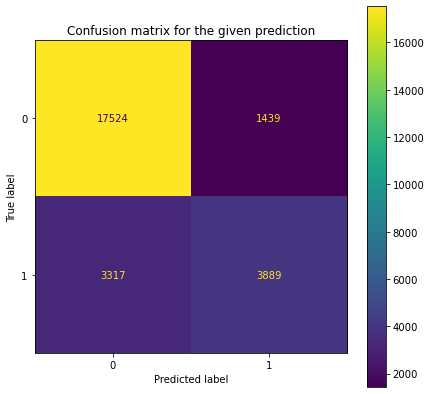

In [180]:
evaluation(y_test,y_pred)

#### We see that even though we are getting an accuracy of 81% we still have a very poor recall score. This is could be possibly rectified with boosting models approach. For this we could use the lightgbm framework. If lightgbm works well it would be our final model. Since we need to correctly predict records that could be cancelled we would be more focused on improving our recall score

In [181]:
from lightgbm import LGBMClassifier

In [206]:
x_train.shape

(61060, 78)

In [204]:
lgbm=LGBMClassifier(scale_pos_weight=3.5)
model=lgbm.fit(x_train,y_train)
y_pred=model.predict(x_test)

Accuracy Score: 0.7434368909778746
f1_score: 0.6430242450021267
Precision: 0.5212032408205481
Recall: 0.8391618096031085
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80     18963
           1       0.52      0.84      0.64      7206

    accuracy                           0.74     26169
   macro avg       0.72      0.77      0.72     26169
weighted avg       0.81      0.74      0.76     26169



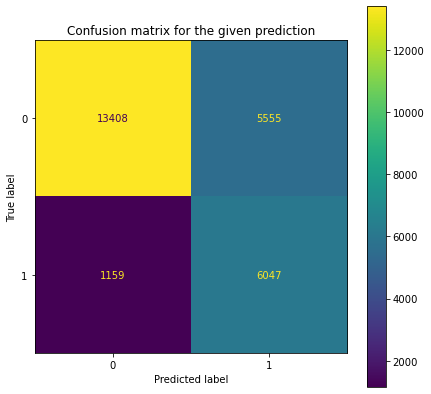

In [205]:
evaluation(y_test,y_pred)